### Finding missing calibration files (wave_A)

I am getting an error on some TOIs where it says they are missing calibration files. I know that some have been downloaded previously, but for some reason they aren't getting put into the correct folders.

Plan:

1. identify the calib files needed.
2. see if I have them anywhere in the data directory.
3. copy them into the TOI folder.

In [ ]:
from pathlib import Path
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import wobble

In [2]:
DATA_DIR = '/srv/scratch/astro/z5345592/data/tess_toi'

In [3]:
TOI_LIST = '5094_01' #list of 1 at the moment to make sure it works.
TOI_DIR = Path(DATA_DIR) / TOI_LIST #just the directory for the toi - need to change when I have more than 1.

In [18]:
wave_file_list = [] #a list of all the wave files needed by this toi
spec_file_keyerrors = [] #sometimes get a keyerror when the wave_file header isn't there - list of those spec files

for file in TOI_DIR.rglob('*e2ds_A.fits'):
    phdu = fits.open(file)
    try:
        wave_file = phdu[0].header['HIERARCH ESO DRS CAL TH FILE']
        wave_file_list.append(wave_file)
    except KeyError:
        spec_file_keyerrors.append(file)

In [24]:
len(spec_file_keyerrors)

120

In [25]:
phdu = fits.open(spec_file_keyerrors[0])

In [ ]:
phdu[0].header

Ok - at least some of the files that don't have wave_A files in their headers seem to be 'calib' type. Going to check to see if this is the case for all of them. Also, check to see what the type is for all the files

In [ ]:
for file in spec_file_keyerrors:
    phdu = fits.open(file)
    print(phdu[0].header['HIERARCH ESO DPR CATG'])

Ok, makes sense, about half of the files for this one TOI are 'calib' files - all of the files in the key errors are calib files. I need to remove them.

In future I should remove them at the end of the download script - keep only the science files

In [30]:
for file in spec_file_keyerrors:
    file.unlink()


In [31]:
count = 0
for file in TOI_DIR.rglob('*e2ds_A.fits'):
    count +=1
print(count)

125


ok, got rid of the ones that were causing the problem. Now going back to seeing whether I have all the wave files.

In [28]:
wave_file_list = [] #a list of all the wave files needed by this toi
spec_file_keyerrors = [] #sometimes get a keyerror when the wave_file header isn't there - list of those spec files

for file in TOI_DIR.rglob('*e2ds_A.fits'):
    phdu = fits.open(file)
    try:
        wave_file = phdu[0].header['HIERARCH ESO DRS CAL TH FILE']
        wave_file_list.append(wave_file)
    except KeyError:
        spec_file_keyerrors.append(file)

In [29]:
len(wave_file_list)

125

In [30]:
len(spec_file_keyerrors)

0

125 science files, no files that caused a key error

In [34]:
count = 0
for wave_file in wave_file_list:
    if(TOI_DIR / wave_file).is_file():
        print(f'{wave_file} exists in this directory')
        count += 1
    else: 
        (f'{wave_file} is missing')
print(f'There are {count} out of 125 calibration files here')

HARPS.2008-12-25T19:21:46.770_wave_A.fits exists in this directory
HARPS.2008-12-06T23:43:45.657_wave_A.fits exists in this directory
HARPS.2010-05-18T22:06:40.279_wave_A.fits exists in this directory
HARPS.2010-05-20T21:42:21.163_wave_A.fits exists in this directory
HARPS.2010-05-21T22:09:24.081_wave_A.fits exists in this directory
HARPS.2010-05-08T21:13:10.946_wave_A.fits exists in this directory
HARPS.2008-12-28T19:44:30.030_wave_A.fits exists in this directory
HARPS.2008-12-29T20:50:28.079_wave_A.fits exists in this directory
HARPS.2009-01-01T21:03:03.236_wave_A.fits exists in this directory
HARPS.2008-12-30T20:44:06.095_wave_A.fits exists in this directory
HARPS.2008-12-24T19:19:41.557_wave_A.fits exists in this directory
HARPS.2010-04-17T21:38:57.187_wave_A.fits exists in this directory
HARPS.2008-12-31T21:23:01.256_wave_A.fits exists in this directory
HARPS.2010-05-24T21:53:35.568_wave_A.fits exists in this directory
HARPS.2008-12-26T20:05:16.202_wave_A.fits exists in this direc

All the wave files for 5094.01 are there. Going to write this up as a series of functions and run on everything.

1. check each e2ds_A.fits file for calib in the header - delete if not science

checking to see if there are any types other than calib and science:

In [ ]:
#this takes way too long to run - do it as a pbs at some point.

cat_types = set()
for file in Path(DATA_DIR).rglob('*e2ds_A.fits'):
    phdu = fits.open(file)
    obs_cat = phdu[0].header['HIERARCH ESO DPR CATG']
    cat_types.add(obs_cat)
print(cat_types)   

In [45]:
phdu = fits.open(Path(TOI_DIR) / 'HARPS.2018-04-09T00:03:14.996_ccf_M2_A.fits')

In [47]:
for file in TOI_DIR.rglob('*ccf_A.fits'):
    phdu = fits.open(file)
    print(phdu[0].header['HIERARCH ESO DPR CATG'])

In [51]:
for file in TOI_DIR.rglob('*ccf_??_A.fits'):
    phdu = fits.open(file)
    print(phdu[0].header['HIERARCH ESO DPR CATG'])

SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE


Oh I can probably do a check to make sure that the ccf is a science file at the start of from_HARPS? Ask Ben? For now put it in analysis.

FYI added to line 52 of analysis

In [35]:
#a function that returns true if a ccf file is science cat

def check_science(file):
    phdu = fits.open(file)
    cat = phdu[0].header['HIERARCH ESO DPR CATG']
    return cat == 'SCIENCE'

In [55]:
check_science(TOI_DIR / 'HARPS.2012-03-13T02:00:09.037_ccf_M2_A.fits')

False

In [57]:
for file in TOI_DIR.rglob('*ccf_??_A.fits'):
    print(check_ccf_science(file))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

In [ ]:
# not finding this file when running anylysis.py for TOI 5094.01:

phdu = fits.open('/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2011-10-16T19:50:30.594_ccf_M2_A.fits')

Checking the CCF files in the directory, do they have a 'science' identifier. Do the amount of CCF files match the number of e2ds files - can I select the CCF files by their category?

In [64]:
for file in TOI_DIR.rglob('*ccf_??_A.fits'):
    phdu = fits.open(file)
    print(phdu[0].header['HIERARCH ESO DPR CATG'])


SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE
SCIENCE


I should be able to select the CCF files by the header 'HIERARCH ESO DPR CATG' and select only the science ones - then hopefully the e2ds files in the directory should match up

In [67]:
count = 0
for file in TOI_DIR.rglob('*ccf_??_A.fits'):
    if check_ccf_science(file):
        count += 1
print(count)

In [8]:
filename = 'HARPS.2016-12-06T07:15:00.957_ccf_M2_A.fits'
phdu = fits.open(Path(TOI_DIR)/filename)
phdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  161 / length of data axis 1                          
NAXIS2  =                   73 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH ESO DRS CCF RVC = 26.5214356409763 / Baryc RV (drift corrected) (km/s) 
HIERARCH ESO DRS CCF CONTRAST = 20.1874647818485 / Contrast of  CCF (%)         
HIERARCH ESO DRS CCF FWHM = 3.16236267913982 / FWHM of CCF (km/s)               
HIERARCH ESO DRS CCF RV = 26.5214356409763 / Baryc RV (no drift correction) (km/
CRVAL1  =                 6.

In [8]:
count = 0
for file in TOI_DIR.rglob('*ccf_??_A.fits'):
    if check_ccf_science(file):
        count += 1
print(count)

125


In [9]:
count = 0
for file in TOI_DIR.rglob('*e2ds_A.fits'):
    if check_ccf_science(file):
        count += 1
print(count)

125


ok, so there are the same amount of science CCF files and science e2ds files. Double check again what the issue is, which one is causing the problem.

In [25]:
wave_files_needed = set()
for file in TOI_DIR.rglob('*e2ds_A.fits'):
    if check_ccf_science(file):
        phdu = fits.open(file)
        wave_file = phdu[0].header['HIERARCH ESO DRS CAL TH FILE']
        print(f'{file.name} requires {wave_file} as a calibration file')
        wave_files_needed.add(wave_file)

HARPS.2008-12-26T06:34:50.163_e2ds_A.fits requires HARPS.2008-12-25T19:21:46.770_wave_A.fits as a calibration file
HARPS.2008-12-07T07:20:52.797_e2ds_A.fits requires HARPS.2008-12-06T23:43:45.657_wave_A.fits as a calibration file
HARPS.2010-05-18T23:00:24.941_e2ds_A.fits requires HARPS.2010-05-18T22:06:40.279_wave_A.fits as a calibration file
HARPS.2010-05-20T23:12:55.057_e2ds_A.fits requires HARPS.2010-05-20T21:42:21.163_wave_A.fits as a calibration file
HARPS.2010-05-21T23:01:24.565_e2ds_A.fits requires HARPS.2010-05-21T22:09:24.081_wave_A.fits as a calibration file
HARPS.2010-05-08T22:57:50.928_e2ds_A.fits requires HARPS.2010-05-08T21:13:10.946_wave_A.fits as a calibration file
HARPS.2008-12-29T07:11:52.111_e2ds_A.fits requires HARPS.2008-12-28T19:44:30.030_wave_A.fits as a calibration file
HARPS.2008-12-30T06:18:08.674_e2ds_A.fits requires HARPS.2008-12-29T20:50:28.079_wave_A.fits as a calibration file
HARPS.2009-01-02T06:35:07.960_e2ds_A.fits requires HARPS.2009-01-01T21:03:03.236

In [23]:
for file in wave_files_needed:
    path = Path(TOI_DIR) / file
    if path.is_file():
        continue
    else:
        print(f'{path.name} does not exist in this directory')

HARPS.2016-12-07T20:31:33.867_wave_A.fits does not exist in this directory
HARPS.2012-12-25T22:07:54.265_e2ds_A.fits does not exist in this directory
HARPS.2012-12-24T20:44:34.558_e2ds_A.fits does not exist in this directory
HARPS.2012-03-02T19:33:30.539_e2ds_A.fits does not exist in this directory
HARPS.2012-12-22T21:05:30.270_e2ds_A.fits does not exist in this directory
HARPS.2016-12-06T20:50:31.943_wave_A.fits does not exist in this directory
HARPS.2016-12-12T20:01:41.857_wave_A.fits does not exist in this directory
HARPS.2011-10-16T19:50:30.594_e2ds_A.fits does not exist in this directory
HARPS.2016-12-05T19:06:10.392_wave_A.fits does not exist in this directory


In [24]:
wave_files_needed

{'HARPS.2008-12-06T23:43:45.657_wave_A.fits',
 'HARPS.2008-12-24T19:19:41.557_wave_A.fits',
 'HARPS.2008-12-25T19:21:46.770_wave_A.fits',
 'HARPS.2008-12-26T20:05:16.202_wave_A.fits',
 'HARPS.2008-12-27T19:38:10.659_wave_A.fits',
 'HARPS.2008-12-28T19:44:30.030_wave_A.fits',
 'HARPS.2008-12-29T20:50:28.079_wave_A.fits',
 'HARPS.2008-12-30T20:44:06.095_wave_A.fits',
 'HARPS.2008-12-31T21:23:01.256_wave_A.fits',
 'HARPS.2009-01-01T21:03:03.236_wave_A.fits',
 'HARPS.2009-01-02T22:01:38.450_wave_A.fits',
 'HARPS.2010-04-17T21:38:57.187_wave_A.fits',
 'HARPS.2010-05-05T20:46:48.070_wave_A.fits',
 'HARPS.2010-05-07T20:02:30.228_wave_A.fits',
 'HARPS.2010-05-08T21:13:10.946_wave_A.fits',
 'HARPS.2010-05-18T22:06:40.279_wave_A.fits',
 'HARPS.2010-05-20T21:42:21.163_wave_A.fits',
 'HARPS.2010-05-21T22:09:24.081_wave_A.fits',
 'HARPS.2010-05-24T21:53:35.568_wave_A.fits',
 'HARPS.2010-11-16T21:39:15.464_wave_A.fits',
 'HARPS.2010-11-20T20:40:00.629_wave_A.fits',
 'HARPS.2010-11-21T21:12:51.078_wa

There are some files that need another spectrum file as a calibration. Does this make sense? Looking at the individual file.

In [27]:
phdu = fits.open(Path(TOI_DIR) / 'HARPS.2012-12-24T07:03:21.272_e2ds_A.fits')
phdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                   72 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'TEST    '                    / European Southern Observatory         
DATE    = '2012-12-24T07:18:23.895'     / UT date when this file was written    
TELESCOP= 'ESO-3P6 '                    / ESO Telescope Name                    
INSTRUME= 'HARPS   '                    / Instrument used.                      
OBJECT  = 'GJ3470  '        

Try a thing where you start of with the CCF file, check that its a science file _then_ check to see if the wave file required by the corresponding e2ds file is in the directory before continuing.

In [54]:
count = 0
for file in Path(TOI_DIR).rglob('*ccf*.fits'):
    if check_science(file):
        phdu = fits.open(file)
        type = phdu[0].header['HIERARCH ESO DPR TYPE']
        print(f"the exposure type for {file.name} is {type}")

the exposure type for HARPS.2008-12-26T06:34:50.163_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2008-12-07T07:20:52.797_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2010-05-18T23:00:24.941_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2010-05-20T23:12:55.057_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2010-05-21T23:01:24.565_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2010-05-08T22:57:50.928_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2008-12-29T07:11:52.111_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2008-12-30T06:18:08.674_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2009-01-02T06:35:07.960_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2008-12-31T06:45:19.652_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2008-12-25T06:38:34.917_ccf_M2_A.fits is STAR,DARK,M1
the exposure type for HARPS.2010-04-17T23:42:28.095_ccf_M2_A.fits is STAR,DARK,M1
the exposure typ

In [55]:
phdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  161 / length of data axis 1                          
NAXIS2  =                   72 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH ESO DRS CCF RVC = 39.8982019914463 / Baryc RV (drift corrected) (km/s) 
HIERARCH ESO DRS CCF CONTRAST = 67.6005298719923 / Contrast of  CCF (%)         
HIERARCH ESO DRS CCF FWHM = 0.900077544450626 / FWHM of CCF (km/s)              
HIERARCH ESO DRS CCF RV = 39.8982019914463 / Baryc RV (no drift correction) (km/
CRVAL1  =                 6.

In [57]:
for file in Path(TOI_DIR).rglob('*ccf*.fits'):
        if check_ccf_science(file):
            phdu = fits.open(file)
            wave_file = phdu[0].header['HIERARCH ESO DRS CAL TH FILE']
            counts = phdu[0].header['HIERARCH ESO INS DET1 CTTOT']
            print(f'{file} needs {wave_file} {counts}')  

/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-26T06:34:50.163_ccf_M2_A.fits needs HARPS.2008-12-25T19:21:46.770_wave_A.fits 450768.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-07T07:20:52.797_ccf_M2_A.fits needs HARPS.2008-12-06T23:43:45.657_wave_A.fits 116543.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-18T23:00:24.941_ccf_M2_A.fits needs HARPS.2010-05-18T22:06:40.279_wave_A.fits 271870.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-20T23:12:55.057_ccf_M2_A.fits needs HARPS.2010-05-20T21:42:21.163_wave_A.fits 320540.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-21T23:01:24.565_ccf_M2_A.fits needs HARPS.2010-05-21T22:09:24.081_wave_A.fits 214781.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-08T22:57:50.928_ccf_M2_A.fits needs HARPS.2010-05-08T21:13:10.946_wave_A.fits 352218.0
/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-29T07:11:52.111_ccf_M2_A.fits 

### Ok - today's plan. Pick the write CCF files, based on the right e2ds files (that are science observations of a star) AND then check that the right calibration files are in the directory.

First. Check the headers of the e2ds files. Which are science, which are dark / background?

In [79]:
phdu_A = fits.open(Path(TOI_DIR) / 'HARPS.2012-02-04T05:24:48.256_e2ds_A.fits')
phdu_B = fits.open(Path(TOI_DIR) / 'HARPS.2012-02-04T05:24:48.256_e2ds_B.fits')

There is no way that I can tell from the headers which is object, which is reference - I will have to presume that they will always be named A for object and B for reference.

Same deal for the ccf files. Will just have to code for '_A'

In [90]:
phdu_A = fits.open(Path(TOI_DIR) / 'HARPS.2012-02-04T05:24:48.256_ccf_M2_A.fits')
phdu_B = fits.open(Path(TOI_DIR) / 'HARPS.2012-02-04T05:24:48.256_ccf_M2_B.fits')

list of all the ccfs. Which is what from_HARPS takes in:

In [104]:
count=0
for ccf in Path(TOI_DIR).rglob(f'*_ccf_M2_A.fits'):
    count+=1
print(count)

121


All the e2ds:

In [105]:
count=0
for ccf in Path(TOI_DIR).rglob(f'*_e2ds_A.fits'):
    count+=1
print(count)

125


There are 4 more. I could build a list of the valid observation codes for the ccfs

In [108]:
str.split('HARPS.2012-02-04T05:24:48.256_ccf_M2_A.fits', '_', 1)[0]

'HARPS.2012-02-04T05:24:48.256'

In [113]:
for ccf in Path(TOI_DIR).rglob(f'*_ccf_M2_A.fits'):
    sp = str.replace(ccf.name, 'ccf_M2', 'e2ds')
    sp = fits.open(Path(TOI_DIR) / sp)
    header = sp[0].header
    wave_file = header['HIERARCH ESO DRS CAL TH FILE']
    print(wave_file)

HARPS.2008-12-25T19:21:46.770_wave_A.fits
HARPS.2008-12-06T23:43:45.657_wave_A.fits
HARPS.2010-05-18T22:06:40.279_wave_A.fits
HARPS.2010-05-20T21:42:21.163_wave_A.fits
HARPS.2010-05-21T22:09:24.081_wave_A.fits
HARPS.2010-05-08T21:13:10.946_wave_A.fits
HARPS.2008-12-28T19:44:30.030_wave_A.fits
HARPS.2008-12-29T20:50:28.079_wave_A.fits
HARPS.2009-01-01T21:03:03.236_wave_A.fits
HARPS.2008-12-30T20:44:06.095_wave_A.fits
HARPS.2008-12-24T19:19:41.557_wave_A.fits
HARPS.2010-04-17T21:38:57.187_wave_A.fits
HARPS.2008-12-31T21:23:01.256_wave_A.fits
HARPS.2010-05-24T21:53:35.568_wave_A.fits
HARPS.2008-12-26T20:05:16.202_wave_A.fits
HARPS.2008-12-27T19:38:10.659_wave_A.fits
HARPS.2010-05-05T20:46:48.070_wave_A.fits
HARPS.2009-01-02T22:01:38.450_wave_A.fits
HARPS.2010-05-07T20:02:30.228_wave_A.fits
HARPS.2012-04-04T19:15:14.639_wave_A.fits
HARPS.2012-01-21T00:17:34.809_wave_A.fits
HARPS.2012-11-24T20:48:14.808_wave_A.fits
HARPS.2012-03-12T19:24:01.006_wave_A.fits
HARPS.2016-10-27T15:30:44.873_wave

In [116]:
a_list = [fn[:29] for fn in Path(TOI_DIR).rglob('*_ccf_M2_A.fits')]

TypeError: 'PosixPath' object is not subscriptable

In [57]:
ccf_file_list = []
for file in Path(TOI_DIR).rglob('*_ccf_M2_A.fits'): #
    obs_id = file.name[:29]
    ccf_file_list.append(obs_id)

In [58]:
wave_file_list = []
for file in Path(TOI_DIR).rglob('*_wave_A.fits'):
    wave_file_list.append(str(file.name))

In [59]:
e2ds_file_list = []
good_ccf_list = []
for file in Path(TOI_DIR).rglob('*_e2ds_A.fits'):
    phdu = fits.open(file)
    header = phdu[0].header
    wave_file = header['HIERARCH ESO DRS CAL TH FILE']
    if wave_file in wave_file_list:
        if (file.name[:29]) in ccf_file_list:
            good_ccf_list.append('/srv/scratch/astro/z5345592/data/tess_toi/5094_01/' + file.name[:29] + '_ccf_M2_A.fits')

In [62]:
data = wobble.Data()
sp = wobble.Spectrum()

In [ ]:
for file in good_ccf_list:
    sp.from_HARPS(str(file), process=False)
    data.append(sp)

In [69]:
np.shape(data.ys)

(72, 115, 4096)

In [76]:
test = np.mean(data.ys, 1)

<ErrorbarContainer object of 3 artists>

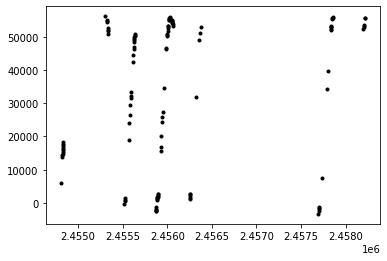

In [110]:
baseline = np.max(data.dates - np.min(data.dates))
plt.errorbar(data.dates, data.pipeline_rvs, yerr=data.pipeline_sigmas, fmt='k.')

Ok - today's plan, turning the stuff I did above into a function that returns the list of ok CCVs and test to make sure I can 'from_HARPS' a few times.

In [ ]:
ccf_file_list = []
for file in Path(TOI_DIR).rglob('*_ccf_M2_A.fits'): #
    obs_id = file.name[:29]
    ccf_file_list.append(obs_id)

wave_file_list = []
for file in Path(TOI_DIR).rglob('*_wave_A.fits'):
    wave_file_list.append(str(file.name))

e2ds_file_list = []
good_ccf_list = []
for file in Path(TOI_DIR).rglob('*_e2ds_A.fits'):
    phdu = fits.open(file)
    header = phdu[0].header
    wave_file = header['HIERARCH ESO DRS CAL TH FILE']
    if wave_file in wave_file_list:
        if (file.name[:29]) in ccf_file_list:
            good_ccf_list.append('/srv/scratch/astro/z5345592/data/tess_toi/5094_01/' + file.name[:29] + '_ccf_M2_A.fits')

In [12]:
def file_check(directory): # a function that takes in a directory and returns the ccfs that have matching spectrum files that also have the correct wave calibs
    
    ccf_file_list = []
    wave_file_list = []
    valid_ccf_files = []
    obs_id_list = []

    for file in Path(directory).rglob('*_ccf_??_A.fits'):
        stellar_type = (file.name)[-9:-7]
        if not any(stellar_type == str for str in ['M2', 'K5', 'G2']): #checks to pick only the ccfs that relate to a stellar observation
            continue
        obs_id = file.name[:29] #slicing the HARPS observation ID
        ccf_file_list.append(str(file)) #making the list of ccfs
        obs_id_list.append(obs_id) #assigning the observation ID to the list

    for file in Path(directory).rglob('*_wave_A.fits'): #loop through the wave files in the directory
        wave_file_list.append(str(file.name)) #assign them to a list

    for file in Path(directory).rglob('*_e2ds_A.fits'):
        phdu = fits.open(file) #primary header data unit of the fits file
        header = phdu[0].header #the header
        wave_file = header['HIERARCH ESO DRS CAL TH FILE'] #wave file filename as found in the spectrum file header
        if wave_file in wave_file_list: #checks to see whether the wave file is in the files in the directory.
            if (file.name[:29]) in obs_id_list: #checks to make sure that the observation ID for the spectrum matches the observation IDs taken from the ccf.
                valid_ccf = [str for str in ccf_file_list if file.name[:29] in str]
                print(valid_ccf)
                # valid_ccf = valid_ccf[0]
                # valid_ccf_files.append(valid_ccf)

    return valid_ccf_files

In [13]:
# data = wobble.Data()
# sp = wobble.Spectrum()

for ccf in file_check('/srv/scratch/astro/z5345592/data/tess_toi/5094_01/'):
    print(ccf)
    # sp.from_HARPS(str(ccf), process=False)
    # data.append(sp)

['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-26T06:34:50.163_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-07T07:20:52.797_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-18T23:00:24.941_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-20T23:12:55.057_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-21T23:01:24.565_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2010-05-08T22:57:50.928_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-29T07:11:52.111_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-30T06:18:08.674_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2009-01-02T06:35:07.960_ccf_M2_A.fits']
['/srv/scratch/astro/z5345592/data/tess_toi/5094_01/HARPS.2008-12-31T06:45:19.652_ccf_M2_A.fits']
['/srv/scratch/astro

<ErrorbarContainer object of 3 artists>

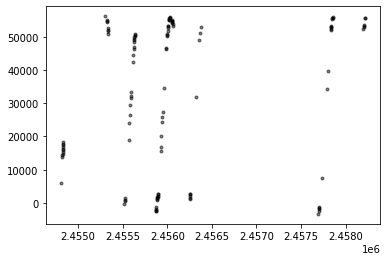

In [100]:
plt.errorbar(data.dates, data.pipeline_rvs, yerr=data.pipeline_sigmas, fmt='k.', alpha=0.5)